# Testing gym4ReaL within WaterDistributionSystem environment

The notebook provides testing and comparison between deterministic policies and RL agent strategies among the `WaterDistributionSystemEnv` environment.

In [38]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ../..

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/dave/Library/CloudStorage/OneDrive-PolitecnicodiMilano/PhD


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
from tqdm import tqdm
from collections import OrderedDict
from gymnasium.utils.env_checker import check_env
import gymnasium as gym

from gym4real.envs.wds.utils import parameter_generator
from gym4real.envs.wds.env_cps import WaterDistributionSystemEnv

In [52]:
sns.set_style('darkgrid')
plot_colors = sns.color_palette()
sns.set(font_scale=1)

## Initialization of the environment 

In [20]:
params = parameter_generator()
env = WaterDistributionSystemEnv(settings=params)
env.reset()

/Users/dave/miniconda3/envs/osx-64/lib/python3.12/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/dave/miniconda3/envs/osx-64/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


(array([3.051, 3.051, 0.   , 0.   , 0.   , 1.   ], dtype=float32),
 {'elapsed_time': 0,
  'timestep': 1,
  'demand_profile': 0      0.139874
  1      0.091421
  2      0.095030
  3      0.103207
  4      0.119833
           ...   
  163    0.306241
  164    0.244512
  165    0.211411
  166    0.180536
  167    0.210597
  Name: 47, Length: 168, dtype: float64,
  'demand_pattern_type': 'normal',
  'reward_components': {'dsr': 0, 'overflow': 0}})

In [25]:
demand = [mult * env._wn.junctions['J1'].basedemand for mult in env._wn.patterns['junc_demand'].values]

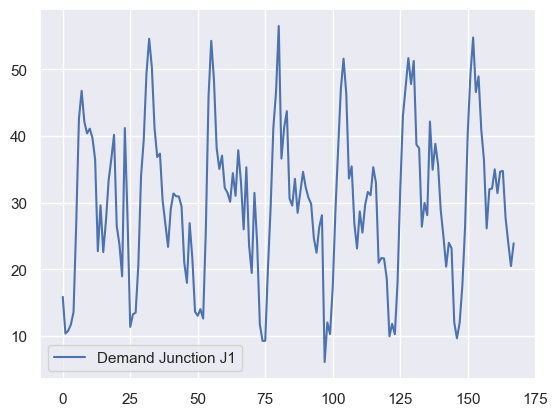

In [55]:
plt.plot(range(len(demand)), demand, label='Demand Junction J1')
plt.legend()

In [58]:
demand_moving_average = pd.Series(demand).rolling(window=6, min_periods=1).mean()
demadn_exp_average = pd.Series(demand).ewm(span=6, min_periods=1).mean()

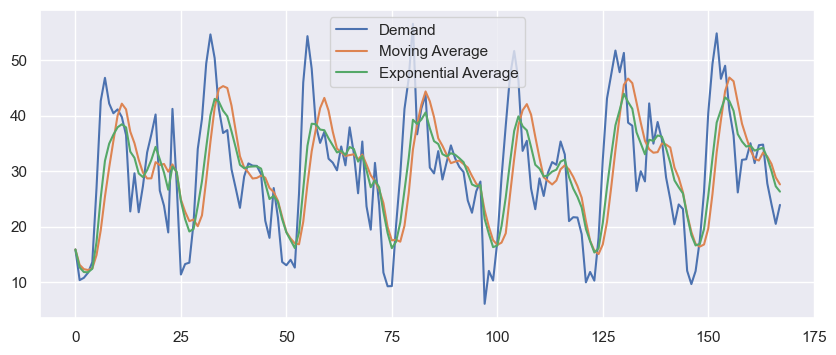

In [59]:
plt.figure(figsize=(10, 4))
plt.plot(demand, label='Demand')
plt.plot(demand_moving_average, label='Moving Average')
plt.plot(demadn_exp_average, label='Exponential Average')
plt.legend()